# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [1]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 47.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


## Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [42]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [19]:
dataframes = {
    'df_hh_income': df_hh_income,
    'df_pct_poverty': df_pct_poverty,
    'df_pct_completed_hs': df_pct_completed_hs,
    'df_share_race_city': df_share_race_city,
    'df_fatalities': df_fatalities
}

df_shapes = {name: df.shape for name, df in dataframes.items()}
print(f'The dataframes have the following shapes: {df_shapes}\n')

print('Here are the column names for each dataframe:\n')

for name, df in dataframes.items():
    columns = ', '.join(df.columns)
    print(f'{name}: {columns}')


The dataframes have the following shapes: {'df_hh_income': (29322, 3), 'df_pct_poverty': (29329, 3), 'df_pct_completed_hs': (29329, 3), 'df_share_race_city': (29268, 7), 'df_fatalities': (2535, 14)}

Here are the column names for each dataframe:

df_hh_income: Geographic Area, City, Median Income
df_pct_poverty: Geographic Area, City, poverty_rate
df_pct_completed_hs: Geographic Area, City, percent_completed_hs
df_share_race_city: Geographic area, City, share_white, share_black, share_native_american, share_asian, share_hispanic
df_fatalities: id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera


In [30]:
for name, df in dataframes.items():
  print(f'{name}:\nNan Values: {df.isna().values.any()}\nDuplicated Values: {df.duplicated().values.any()}\n')

df_hh_income:
Nan Values: True
Duplicated Values: False

df_pct_poverty:
Nan Values: False
Duplicated Values: False

df_pct_completed_hs:
Nan Values: False
Duplicated Values: False

df_share_race_city:
Nan Values: False
Duplicated Values: False

df_fatalities:
Nan Values: True
Duplicated Values: False



## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [36]:
df_hh_income.isna().value_counts()

Geographic Area  City   Median Income
False            False  False            29271
                        True                51
dtype: int64

In [38]:
df_hh_income.tail()

,Geographic Area,City,Median Income
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500
29321,WY,Y-O Ranch CDP,NaN


In [45]:
# df_hh_income[df_hh_income['Median Income'].isna()]
df_hh_income['Median Income'] = df_hh_income['Median Income'].fillna(0)
df_hh_income.tail()

,Geographic Area,City,Median Income
29317,WY,Woods Landing-Jelm CDP,0
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500
29321,WY,Y-O Ranch CDP,0


In [46]:
df_hh_income.isna().values.any()

False

In [58]:
nan_rows = df_fatalities[df_fatalities.isna().any(axis=1)]
print(nan_rows)

        id                name      date   manner_of_death    armed   age  \
59     110    William Campbell  25/01/15              shot      gun 59.00   
124    584   Alejandro Salazar  20/02/15              shot      gun   NaN   
241    244  John Marcell Allen  30/03/15              shot      gun 54.00   
266    534          Mark Smith  09/04/15  shot and Tasered  vehicle 54.00   
340    433          Joseph Roy  07/05/15              shot    knife 72.00   
...    ...                 ...       ...               ...      ...   ...   
2528  2812  Alejandro Alvarado  27/07/17              shot    knife   NaN   
2529  2819    Brian J. Skinner  28/07/17              shot    knife 32.00   
2530  2822    Rodney E. Jacobs  28/07/17              shot      gun 31.00   
2531  2813               TK TK  28/07/17              shot  vehicle   NaN   
2532  2818  Dennis W. Robinson  29/07/17              shot      gun 48.00   

     gender race           city state  signs_of_mental_illness threat_level

In [61]:
df_fatalities['age'] = df_fatalities['age'].fillna(0)

In [62]:
df_fatalities['age'].isna().values.any()

False

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [65]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [67]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty['poverty_rate'])

ValueError: ignored

In [73]:
df_pct_poverty.loc[573]

Geographic Area             AL
City               Whatley CDP
poverty_rate                 -
Name: 573, dtype: object

In [79]:
df_pct_poverty.poverty_rate.replace(to_replace='-', value=0, inplace=True)

In [80]:
df_pct_poverty.loc[573]

Geographic Area             AL
City               Whatley CDP
poverty_rate                 0
Name: 573, dtype: object

In [81]:
df_pct_poverty.poverty_rate = pd.to_numeric(df_pct_poverty['poverty_rate'])

In [82]:
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [88]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.80
1,AL,Abbeville city,29.10
2,AL,Adamsville city,25.50
3,AL,Addison town,30.70
4,AL,Akron town,42.00


In [99]:
poverty_by_state = df_pct_poverty.groupby('Geographic Area', as_index=False).agg({'poverty_rate': 'mean'})
poverty_by_state = poverty_by_state.sort_values(by='poverty_rate', ascending=False)
poverty_by_state

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.27
10,GA,23.66
2,AR,22.96
32,NM,22.51
18,LA,22.29
40,SC,22.11
49,WV,21.08
1,AL,20.61
36,OK,20.55


In [100]:
print(f"The state with the highest poverty rate is {poverty_by_state['Geographic Area'].loc[poverty_by_state.poverty_rate.idxmax()]}")

The state with the highest poverty rate is MS


In [101]:
print(f"The state with the lowest poverty rate is {poverty_by_state['Geographic Area'].loc[poverty_by_state.poverty_rate.idxmin()]}")

The state with the lowest poverty rate is NJ


In [102]:
poverty_chart = px.bar(poverty_by_state, x='Geographic Area', y='poverty_rate', color='Geographic Area')
poverty_chart.update_layout(yaxis_title='Poverty Rate %', xaxis_title='State', title='Average Poverty Rate Among US States', legend_title='US State')
poverty_chart.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [97]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
grad_rate = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': 'mean'})
grad_rate = grad_rate.sort_values(by='percent_completed_hs')
grad_rate

In [110]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'])

In [109]:
df_pct_completed_hs['percent_completed_hs'].replace(to_replace='-', value=0, inplace=True)

In [111]:
grad_rate = df_pct_completed_hs.groupby('Geographic Area', as_index=False).agg({'percent_completed_hs': 'mean'})
grad_rate = grad_rate.sort_values(by='percent_completed_hs')
grad_rate

,Geographic Area,percent_completed_hs
43,TX,74.09
25,MS,78.47
10,GA,78.63
32,NM,78.97
18,LA,79.12
3,AZ,79.22
2,AR,79.95
0,AK,80.10
1,AL,80.16
40,SC,80.65


In [112]:
print(f"The State with the lowest high school graduation rate is {grad_rate['Geographic Area'].loc[grad_rate['percent_completed_hs'].idxmin()]}")

The State with the lowest high school graduation rate is TX


In [113]:
print(f"The State with the highest high school graduation rate is {grad_rate['Geographic Area'].loc[grad_rate['percent_completed_hs'].idxmax()]}")

The State with the highest high school graduation rate is MA


In [116]:
graduation_chart = px.bar(grad_rate, x='Geographic Area', y='percent_completed_hs', color='Geographic Area')
graduation_chart.update_layout(yaxis_title='High School Graduation Rate %', xaxis_title='State', title='Average Poverty Rate Among US States', legend_title='US State')
graduation_chart.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [125]:
poverty_by_state = poverty_by_state.sort_values(by='Geographic Area')

In [144]:
grad_rate = grad_rate.sort_values(by='Geographic Area')

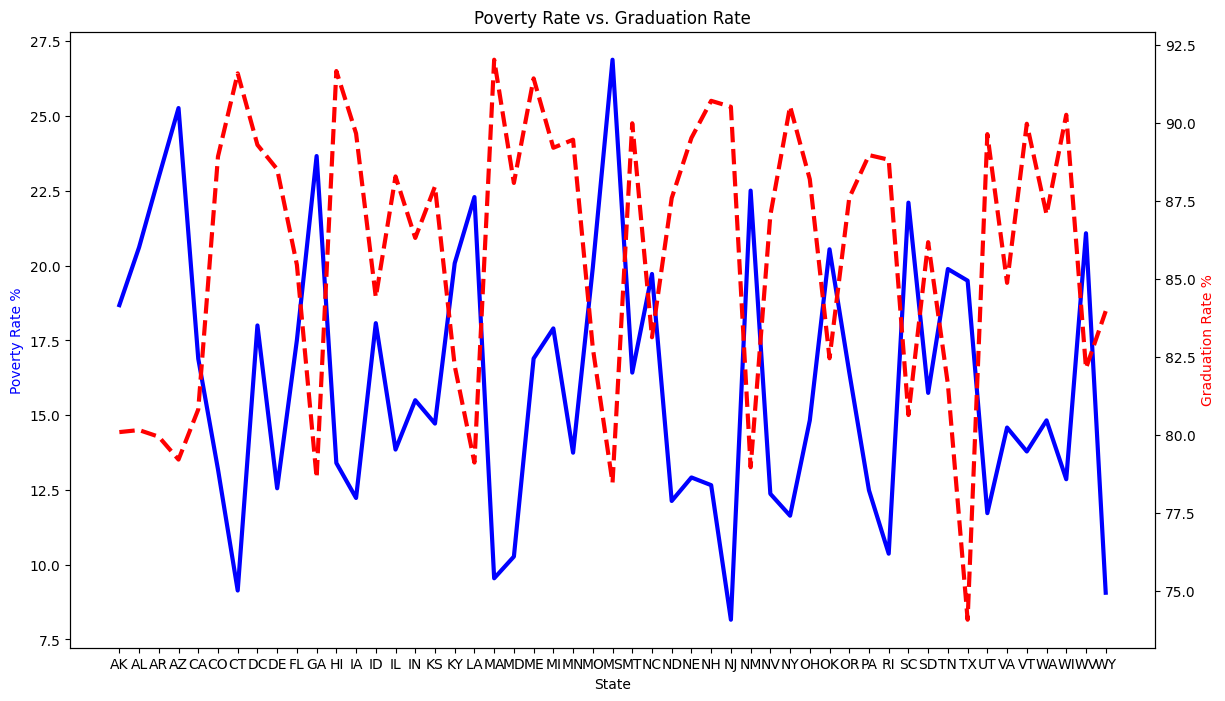

In [153]:
# This is just the normal plot, but I think it's not that easy to understand, hence the other graph below this one
plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(poverty_by_state['Geographic Area'], poverty_by_state['poverty_rate'], color='blue', linewidth=3)
ax2.plot(grad_rate['Geographic Area'], grad_rate['percent_completed_hs'], color='red', linewidth=3, linestyle='--')

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate %', color='blue')
ax2.set_ylabel('Graduation Rate %', color='red')
plt.title('Poverty Rate vs. Graduation Rate')
plt.show()

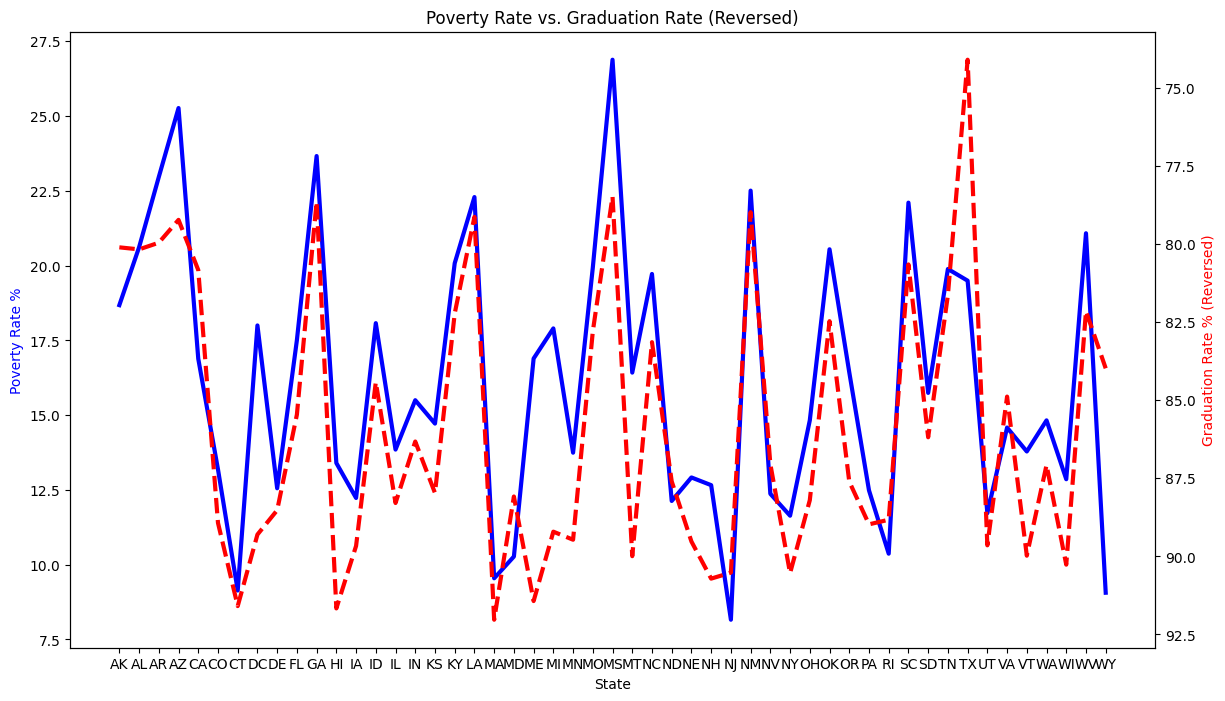

In [155]:
# I decided to invert the graduation rate on the y axis so that it's easier to understand that they are inversely related
plt.figure(figsize=(14,8))
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(poverty_by_state['Geographic Area'], poverty_by_state['poverty_rate'], color='blue', linewidth=3)
ax2.plot(grad_rate['Geographic Area'], grad_rate['percent_completed_hs'], color='red', linewidth=3, linestyle='--')

ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate %', color='blue')
ax2.set_ylabel('Graduation Rate % (Reversed)', color='red')
ax2.invert_yaxis()
plt.title('Poverty Rate vs. Graduation Rate (Reversed)')
plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

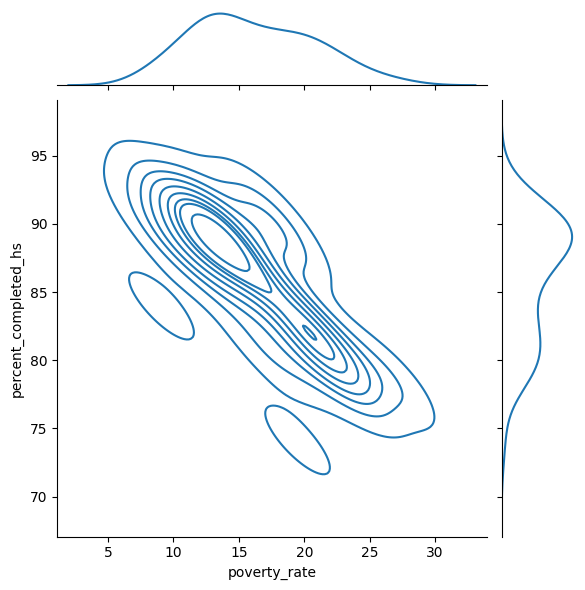

In [176]:
sns.jointplot(x=poverty_by_state.poverty_rate, y=grad_rate.percent_completed_hs, kind='kde')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

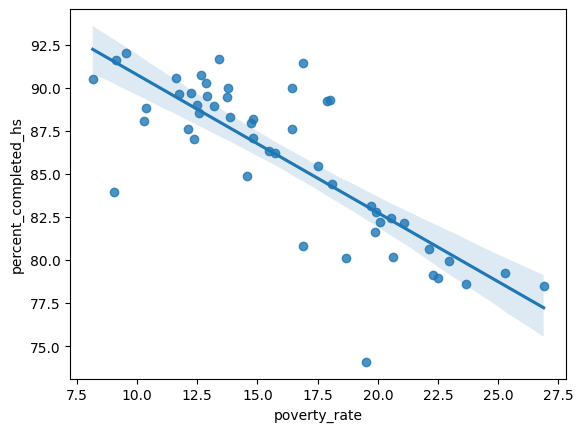

In [177]:
sns.regplot(x=poverty_by_state.poverty_rate, y=grad_rate.percent_completed_hs)
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

In [259]:
racial_share = df_share_race_city.copy()
racial_share.share_white = pd.to_numeric(racial_share.share_white, errors='coerce')
racial_share.share_black = pd.to_numeric(racial_share.share_black, errors='coerce')
racial_share.share_native_american = pd.to_numeric(racial_share.share_native_american, errors='coerce')
racial_share.share_asian = pd.to_numeric(racial_share.share_asian, errors='coerce')
racial_share.share_hispanic = pd.to_numeric(racial_share.share_hispanic, errors='coerce')
racial_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [262]:
racial_share = racial_share.groupby('Geographic area').sum()
total_sum = racial_share.sum(axis=1)
racial_share_normalized = racial_share.div(total_sum, axis=0).reset_index()
racial_share_normalized.head(1)
# racial_share.head(1)
# print(total_sum)

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,0.48,0.01,0.48,0.01,0.02


In [266]:
race_graph = px.bar(racial_share_normalized, x='Geographic area', y=['share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic'], title='Racial Distribution Across US States')
race_graph.update_layout(xaxis_title='State', yaxis_title='Distribution', legend_title='Races')
race_graph.update_yaxes(tickformat='.0%')
race_graph.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [288]:
df_fatalities.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [308]:
rows_with_nan_race = df_fatalities.loc[df_fatalities['race'].isna()]
print(rows_with_nan_race)

        id                  name      date   manner_of_death    armed   age  \
59     110      William Campbell  25/01/15              shot      gun 59.00   
241    244    John Marcell Allen  30/03/15              shot      gun 54.00   
266    534            Mark Smith  09/04/15  shot and Tasered  vehicle 54.00   
340    433            Joseph Roy  07/05/15              shot    knife 72.00   
398    503  James Anthony Morris  31/05/15              shot      gun 40.00   
...    ...                   ...       ...               ...      ...   ...   
2527  2811        Matthew Folden  27/07/17              shot    knife 31.00   
2529  2819      Brian J. Skinner  28/07/17              shot    knife 32.00   
2530  2822      Rodney E. Jacobs  28/07/17              shot      gun 31.00   
2531  2813                 TK TK  28/07/17              shot  vehicle  0.00   
2532  2818    Dennis W. Robinson  29/07/17              shot      gun 48.00   

     gender race           city state  signs_of_men

In [311]:
# I was originally getting an error because there were nan values in the race column so i used dropna() in the names
fig = px.pie(df_fatalities, values=df_fatalities.race.value_counts(), names=df_fatalities.race.dropna().unique())
fig.update_layout(title='Deaths by Race', legend_title='Races')
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

In [321]:
death_by_gender = df_fatalities.copy()

In [322]:
death_by_gender.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [323]:
death_by_gender = death_by_gender.groupby('gender', as_index=False).agg({'date': 'count'})

,gender,date
0,F,107
1,M,2428


In [328]:
gender_graph = px.pie(death_by_gender, values='date', names='gender')
gender_graph.update_layout(title='Deaths by Gender', legend_title='Gender')
gender_graph.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

In [360]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False


In [364]:
box = px.box(df_fatalities, x='manner_of_death', y='age', color='gender')
box.update_layout(title='Manner of death by age and gender')
box.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

In [365]:
df_fatalities.head(1)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False


In [366]:
df_fatalities.armed.value_counts()

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
                ... 
hand torch         1
garden tool        1
pole               1
pick-axe           1
pen                1
Name: armed, Length: 68, dtype: int64

In [377]:
armed_chart = px.bar(df_fatalities, x=df_fatalities['armed'].dropna().unique(), y=df_fatalities['armed'].value_counts())
armed_chart.update_layout(title="Number of Deaths vs Victim's Weapon", xaxis_title="Type of Weapon", yaxis_title="Number of Deaths")
armed_chart.update_traces(marker_color='crimson')
armed_chart.show()

In [388]:
unarmed = df_fatalities['armed'][df_fatalities.armed == "unarmed"].count()
undetermined = df_fatalities['armed'][df_fatalities.armed == "undetermined"].count()
print(f'The number of deaths of unarmed people was {unarmed},\nand there were also {undetermined} deaths where it was unclear whether victims were armed or not.')

The number of deaths of unarmed people was 171,
and there were also 117 deaths where it was unclear whether victims were armed or not.


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [394]:
under_25 = (df_fatalities.age[df_fatalities['age'] < 25].count() / df_fatalities.age.count()) * 100
print(f'Approximately {round(under_25, 2)}% of victims were under 25 years old')

Approximately 20.79% of victims were under 25 years old


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

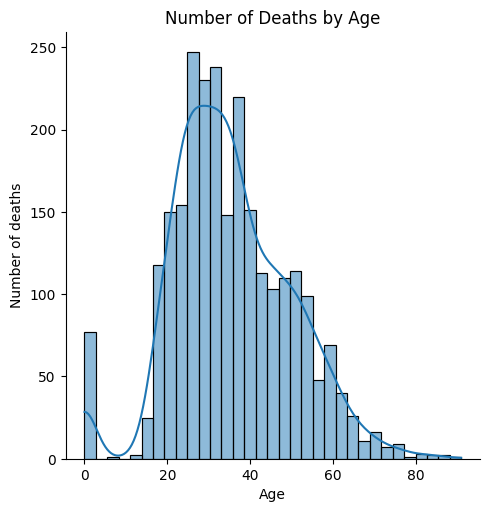

In [404]:
sns.displot(df_fatalities.age, kde=True)
plt.ylabel('Number of deaths')
plt.xlabel('Age')
plt.title('Number of Deaths by Age')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions?

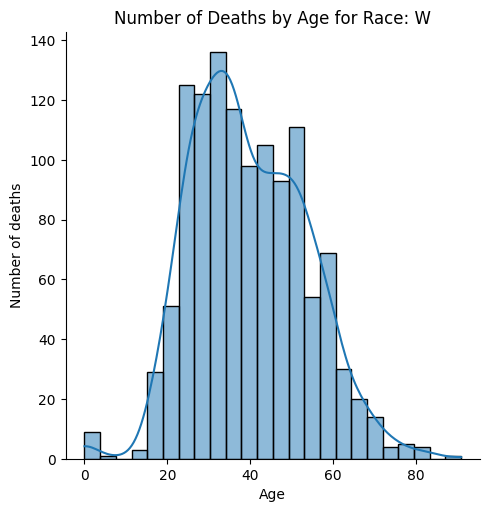

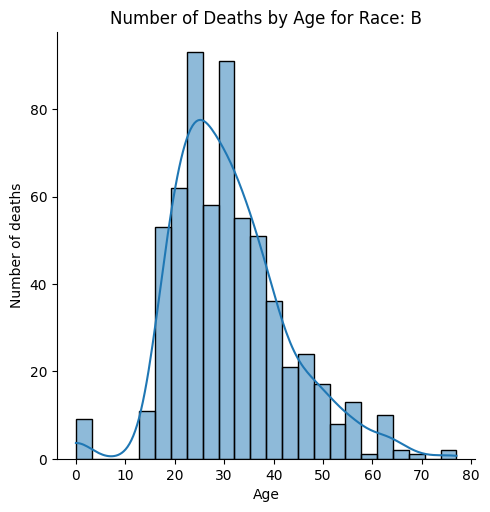

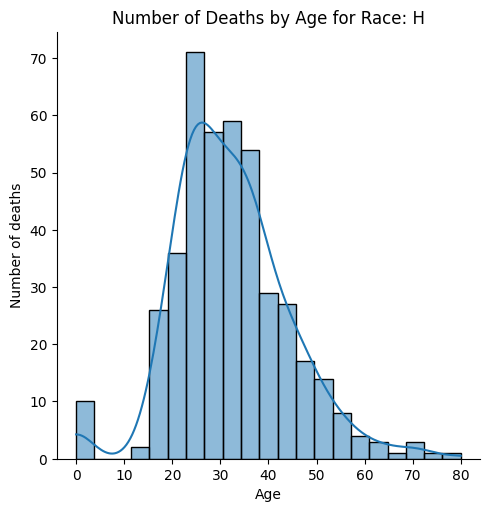

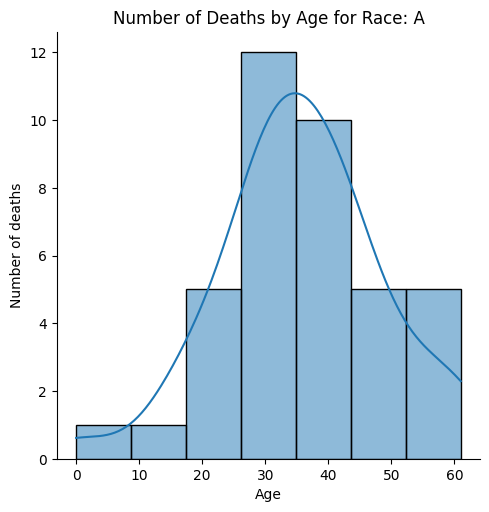

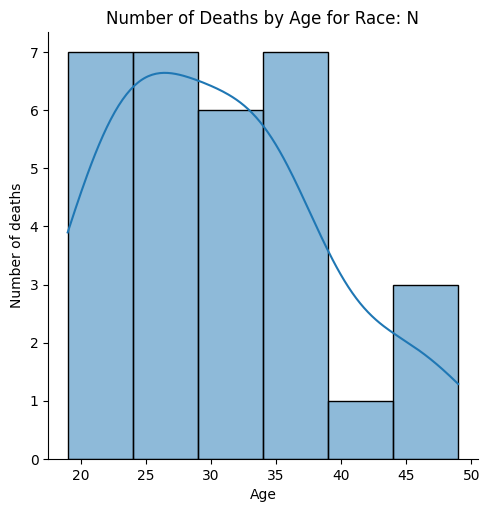

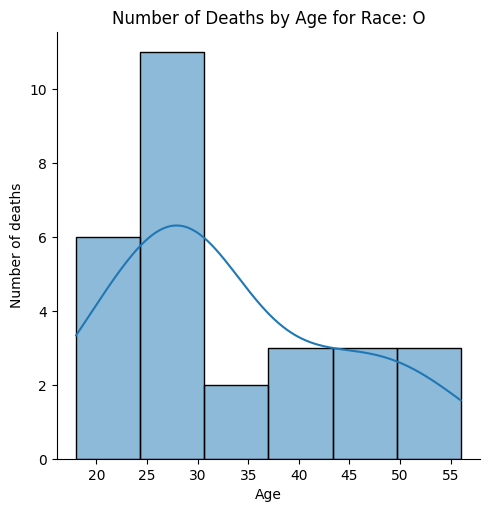

In [412]:
races = df_fatalities.race.value_counts()
for race in races.index:
  sns.displot(data=df_fatalities[df_fatalities.race == race], x='age', kde=True)
  plt.ylabel('Number of deaths')
  plt.xlabel('Age')
  plt.title(f'Number of Deaths by Age for Race: {race}')
  plt.show()

In [413]:
df_fatalities.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

# Race of People Killed

Create a chart that shows the total number of people killed by race.

In [426]:
fig = px.bar(x=df_fatalities.race.value_counts().index, y=df_fatalities.race.value_counts().values, color=df_fatalities.race.value_counts().index)
fig.update_layout(title='Number of Deaths by Race', xaxis_title='Race', yaxis_title='Number of Deaths', legend_title='Race')
fig.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [437]:
diagnosed = df_fatalities.signs_of_mental_illness.value_counts()[1]
diag_pct = f'{(diagnosed / df_fatalities.signs_of_mental_illness.count()) * 100:.2f}%'
print(f'About {diag_pct} of the people who were killed had been diagnosed with mental illness.')

About 24.97% of the people who were killed had been diagnosed with mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [451]:
city_counts = df_fatalities.city.value_counts()
city_counts_df = pd.DataFrame({'City': city_counts.index, 'Count': city_counts.values})
top10 = city_counts_df.sort_values(by='Count', ascending=False)[:10]
top10.index += 1
top10

,City,Count
1,Los Angeles,39
2,Phoenix,31
3,Houston,27
4,Chicago,25
5,Las Vegas,21
6,San Antonio,20
7,Columbus,19
8,Austin,18
9,Miami,18
10,St. Louis,15


In [457]:
print(f'The top 10 most dangerous cities, according to the data,\nare {", ".join(top10.City.values)}.')

The top 10 most dangerous cities, according to the data,
are Los Angeles, Phoenix, Houston, Chicago, Las Vegas, San Antonio, Columbus, Austin, Miami, St. Louis.


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [462]:
top10.City.values

array(['Los Angeles', 'Phoenix', 'Houston', 'Chicago', 'Las Vegas',
       'San Antonio', 'Columbus', 'Austin', 'Miami', 'St. Louis'],
      dtype=object)

In [ ]:
race_share = df_fatalities.race.value_counts()

In [471]:
print(top10.City)

1     Los Angeles
2         Phoenix
3         Houston
4         Chicago
5       Las Vegas
6     San Antonio
7        Columbus
8          Austin
9           Miami
10      St. Louis
Name: City, dtype: object


In [582]:
race_city = df_share_race_city.copy()

In [583]:
for race in race_share.index:
  race_city.insert(len(race_city.columns), race, None)

In [584]:
race_city.head(0)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,W,B,H,A,N,O


In [585]:
race_city.loc[race_city['City'].str.contains("Los Angeles", na=False)]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,W,B,H,A,N,O
2320,CA,East Los Angeles CDP,50.50,0.60,1.20,0.90,97.10,None,None,None,None,None,None
2474,CA,Green Valley CDP (Los Angeles County),87.70,0.80,1.10,1.20,12.00,None,None,None,None,None,None
2627,CA,Lake Los Angeles CDP,55.70,11.30,1.40,0.90,53.60,None,None,None,None,None,None
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50,None,None,None,None,None,None
25400,TX,Los Angeles CDP,63.60,9.10,0.00,0.00,100.00,None,None,None,None,None,None


In [586]:
for city in top10.City.values:
  if not race_city.loc[race_city['City'].str.contains(city, na=False)].empty:
    for h_race in race_share.index:
      if h_race in df_fatalities[df_fatalities["city"] == city].race.value_counts().index:
        race_value = df_fatalities[(df_fatalities["city"] == city) & (df_fatalities["race"] == h_race)].race.count()
        race_city.loc[race_city['City'].str.contains(city, na=False), h_race] = race_value


In [570]:
# This would convert the parcial matches into exact matches, but I decided it's best to just keep them
# for city in top10.City.values:
#   if not race_city.loc[race_city['City'].str.contains(city, na=False)].empty:
#     mask = race_city['City'].str.contains(city, na=False)
#     race_city.loc[mask, 'City'] = city

In [587]:
race_city.loc[race_city['City'].str.contains("Los Angeles", na=False)]

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,W,B,H,A,N,O
2320,CA,East Los Angeles CDP,50.50,0.60,1.20,0.90,97.10,6,10,19,1,None,None
2474,CA,Green Valley CDP (Los Angeles County),87.70,0.80,1.10,1.20,12.00,6,10,19,1,None,None
2627,CA,Lake Los Angeles CDP,55.70,11.30,1.40,0.90,53.60,6,10,19,1,None,None
2714,CA,Los Angeles city,49.80,9.60,0.70,11.30,48.50,6,10,19,1,None,None
25400,TX,Los Angeles CDP,63.60,9.10,0.00,0.00,100.00,6,10,19,1,None,None


In [612]:
filtered_race_city = race_city[race_city['City'].str.contains('|'.join(top10['City']), na=False)]
filtered_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,W,B,H,A,N,O
712,AK,Houston city,82.20,0.40,6.70,0.60,3.30,3,15,6,1,1,None
1161,AZ,Miami town,73.70,0.30,2.30,0.20,56.00,3,8,6,None,None,None
1201,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80,12,2,11,None,3,None
1404,AR,Austin city,94.20,2.00,0.30,0.40,4.30,13,3,2,None,None,None
1628,AR,Houston town,98.80,0.00,0.00,0.00,0.60,3,15,6,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,TX,Los Angeles CDP,63.60,9.10,0.00,0.00,100.00,6,10,19,1,None,None
25490,TX,Miami city,94.10,0.20,0.50,0.20,7.90,3,8,6,None,None,None
25872,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20,3,3,12,None,None,None
25974,TX,South Houston city,65.90,1.50,0.90,0.60,88.10,3,15,6,1,1,None


In [ ]:
race_columns = {
    'White': ('W', 'share_white'),
    'Black': ('B', 'share_black'),
    'Hispanic': ('H', 'share_hispanic'),
    'Asian': ('A', 'share_asian'),
    'Native American': ('N', 'share_native_american'),
}
for race, (race_code, share_column) in race_columns.items():
    death_column = race_code
    # Death rate per 1,000 people of that race
    filtered_race_city[f'Death Rate_{race}'] = (filtered_race_city[death_column] / filtered_race_city[share_column]) * 1000.0


In [615]:
filtered_race_city

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic,W,B,H,A,N,O,Death Rate_White,Death Rate_Black,Death Rate_Hispanic,Death Rate_Asian,Death Rate_Native American
712,AK,Houston city,82.20,0.40,6.70,0.60,3.30,3,15,6,1,1,None,36.50,"37,500.00","1,818.18","1,666.67",149.25
1161,AZ,Miami town,73.70,0.30,2.30,0.20,56.00,3,8,6,None,None,None,40.71,"26,666.67",107.14,NaN,NaN
1201,AZ,Phoenix city,65.90,6.50,2.20,3.20,40.80,12,2,11,None,3,None,182.09,307.69,269.61,NaN,"1,363.64"
1404,AR,Austin city,94.20,2.00,0.30,0.40,4.30,13,3,2,None,None,None,138.00,"1,500.00",465.12,NaN,NaN
1628,AR,Houston town,98.80,0.00,0.00,0.00,0.60,3,15,6,1,1,None,30.36,inf,"10,000.00",inf,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25400,TX,Los Angeles CDP,63.60,9.10,0.00,0.00,100.00,6,10,19,1,None,None,94.34,"1,098.90",190.00,inf,NaN
25490,TX,Miami city,94.10,0.20,0.50,0.20,7.90,3,8,6,None,None,None,31.88,"40,000.00",759.49,NaN,NaN
25872,TX,San Antonio city,72.60,6.90,0.90,2.40,63.20,3,3,12,None,None,None,41.32,434.78,189.87,NaN,NaN
25974,TX,South Houston city,65.90,1.50,0.90,0.60,88.10,3,15,6,1,1,None,45.52,"10,000.00",68.10,"1,666.67","1,111.11"


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty?

In [626]:
state_deaths = df_fatalities.copy()

In [627]:
state_deaths = state_deaths.groupby('state', as_index=False).agg({'id': 'count'})
state_deaths.rename(columns={'id': 'Number of Deaths'}, inplace=True)
state_deaths

,state,Number of Deaths
0,AK,15
1,AL,50
2,AR,26
3,AZ,118
4,CA,424
5,CO,74
6,CT,9
7,DC,11
8,DE,8
9,FL,154


In [631]:
fig = px.choropleth(state_deaths, locations=state_deaths.state,
                    color="Number of Deaths", # lifeExp is a column of gapminder
                    hover_name=state_deaths.state, locationmode="USA-states", scope="usa",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(title="Number of Police Killings per US State")
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

In [661]:
over_time = df_fatalities.copy()

In [662]:
over_time.date = pd.to_datetime(over_time.date)

In [663]:
over_time = over_time.groupby('date').agg({'id': 'count'})
over_time = over_time.sort_values(by='date')
over_time = over_time.rename(columns={'id': 'Number of Deaths'})

In [664]:
over_time.head()

,Number of Deaths
date,
2015-01-03,3
2015-01-04,2
2015-01-06,1
2015-01-07,2
2015-01-08,2


In [670]:
# Since it looks like the information is almost daily, I created a rolling average to smooth out the chart
roll_df = over_time.rolling(window=80).mean()
roll_df

,Number of Deaths
date,
2015-01-03,NaN
2015-01-04,NaN
2015-01-06,NaN
2015-01-07,NaN
2015-01-08,NaN
...,...
2017-12-03,2.83
2017-12-04,2.80
2017-12-05,2.84


In [673]:
kill_chart = px.line(roll_df, x=roll_df.index, y=roll_df['Number of Deaths'])
kill_chart.update_layout(title='Number of Daily Fatal Deaths by the US Police')
kill_chart.show()